# Actual TensorFlow Intro

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Data generation

In [2]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,(observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)
#Not necesary for the names to be inputs and targets, we can call it whatever

In [4]:
xs[0:10]

array([[ 6.59138571],
       [ 3.93953394],
       [ 5.40587804],
       [ 1.9676496 ],
       [ 7.34361671],
       [-5.33590189],
       [-5.22385985],
       [-2.75916693],
       [-7.71773374],
       [ 7.53903849]])

In [5]:
zs[0:10]

array([[-8.34865797],
       [ 0.13751079],
       [-7.51728304],
       [-6.47518457],
       [ 0.37893078],
       [-7.26887883],
       [-5.2108618 ],
       [-6.61194567],
       [-2.45169   ],
       [ 1.09695864]])

In [6]:
generated_inputs[0]

array([ 6.59138571, -8.34865797])

## Solving with TensorFlow

In [7]:
training_data = np.load('TF_intro.npz')

In [12]:
input_size = 2
output_size = 1

# model = tf.keras.Sequential([
#                             tf.keras.layers.Dense(output_size)
#                             ])

#We can add a weights 

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size,
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 )
                            ])

model.compile(optimizer='sgd',loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 611us/step - loss: 33.9583
Epoch 2/100
32/32 [==============================] - 0s 579us/step - loss: 4.2669
Epoch 3/100
32/32 [==============================] - 0s 676us/step - loss: 1.4313
Epoch 4/100
32/32 [==============================] - 0s 676us/step - loss: 0.6364
Epoch 5/100
32/32 [==============================] - 0s 611us/step - loss: 0.4252
Epoch 6/100
32/32 [==============================] - 0s 579us/step - loss: 0.3640
Epoch 7/100
32/32 [==============================] - 0s 611us/step - loss: 0.3415
Epoch 8/100
32/32 [==============================] - 0s 676us/step - loss: 0.3452
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3395
Epoch 10/100
32/32 [==============================] - 0s 740us/step - loss: 0.3417
Epoch 11/100
32/32 [==============================] - 0s 643us/step - loss: 0.3353
Epoch 12/100
32/32 [==============================] - 0s 643us/step - loss: 0.3451
Epoch 13/100
3

## Extract the weigths and bias

In [13]:
model.layers[0].get_weights()

[array([[ 2.041424 ],
        [-2.9718618]], dtype=float32),
 array([4.9885383], dtype=float32)]

In [15]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.041424 ],
       [-2.9718618]], dtype=float32)

In [16]:
bias = model.layers[0].get_weights()[1]
bias

array([4.9885383], dtype=float32)

## Extract the outputs (make predictions)

In [17]:
model.predict_on_batch(training_data['inputs'])

array([[ 7.00565434e+00],
       [-3.16277752e+01],
       [-2.37629843e+00],
       [ 1.49958363e+01],
       [-1.83285427e+01],
       [ 4.38832550e+01],
       [-1.35164757e+01],
       [-1.93531399e+01],
       [ 3.12157497e+01],
       [ 1.44704552e+01],
       [-2.57214279e+01],
       [-1.47472401e+01],
       [ 1.27581806e+01],
       [ 1.71956310e+01],
       [ 1.72981548e+01],
       [-8.56078148e+00],
       [ 1.21108341e+01],
       [-2.42677174e+01],
       [-1.08070011e+01],
       [ 5.85808611e+00],
       [ 2.45680485e+01],
       [ 3.36016045e+01],
       [-9.23302460e+00],
       [ 2.58101368e+01],
       [ 1.12452297e+01],
       [ 4.05812531e+01],
       [ 2.02688160e+01],
       [ 1.49938908e+01],
       [ 3.45458269e+00],
       [ 3.50799942e+01],
       [-4.10851555e+01],
       [ 4.68200645e+01],
       [ 3.01648426e+01],
       [-8.47104836e+00],
       [ 8.37671089e+00],
       [-2.30268040e+01],
       [-3.01703968e+01],
       [-1.81684971e+01],
       [-2.6

In [19]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[  7. ],
       [-31.6],
       [ -2.4],
       [ 15. ],
       [-18.3],
       [ 43.9],
       [-13.5],
       [-19.4],
       [ 31.2],
       [ 14.5],
       [-25.7],
       [-14.7],
       [ 12.8],
       [ 17.2],
       [ 17.3],
       [ -8.6],
       [ 12.1],
       [-24.3],
       [-10.8],
       [  5.9],
       [ 24.6],
       [ 33.6],
       [ -9.2],
       [ 25.8],
       [ 11.2],
       [ 40.6],
       [ 20.3],
       [ 15. ],
       [  3.5],
       [ 35.1],
       [-41.1],
       [ 46.8],
       [ 30.2],
       [ -8.5],
       [  8.4],
       [-23. ],
       [-30.2],
       [-18.2],
       [-26.6],
       [ 36.6],
       [-17.3],
       [  9.6],
       [ 21.1],
       [  0.4],
       [ 22.7],
       [ -1.9],
       [ -3. ],
       [-15.6],
       [  7.5],
       [-11.1],
       [ -2.1],
       [ -5.1],
       [  7.6],
       [-24.7],
       [  9.6],
       [ -8.5],
       [ 21.6],
       [  4.4],
       [ 11.2],
       [-19.8],
       [  3.1],
       [-14.5],
       [

In [21]:
training_data['targets'].round(1)

array([[  6.5],
       [-31. ],
       [ -1.8],
       [ 15.9],
       [-17.8],
       [ 42.9],
       [-13.8],
       [-19.3],
       [ 30.5],
       [ 15. ],
       [-26.8],
       [-15.8],
       [ 13.8],
       [ 16.8],
       [ 16.9],
       [ -8. ],
       [ 11.8],
       [-24.5],
       [-10.5],
       [  4.6],
       [ 25.2],
       [ 33.1],
       [ -9.4],
       [ 25.6],
       [ 12.1],
       [ 39.7],
       [ 19.5],
       [ 15. ],
       [  4.8],
       [ 35.6],
       [-40.6],
       [ 46.6],
       [ 30. ],
       [ -9.2],
       [  8.1],
       [-21.9],
       [-29.7],
       [-17.8],
       [-26. ],
       [ 36.7],
       [-17.6],
       [  9.6],
       [ 20.8],
       [  0.1],
       [ 22.8],
       [ -1.9],
       [ -3.4],
       [-14.8],
       [  7.2],
       [-11.8],
       [ -0.8],
       [ -4.6],
       [  7.8],
       [-24.7],
       [  9.1],
       [ -7.9],
       [ 21.4],
       [  2.8],
       [ 11.6],
       [-20.7],
       [  3.9],
       [-14. ],
       [

## Plotting the data

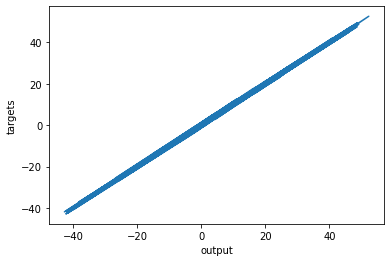

In [22]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('output')
plt.ylabel('targets')
plt.show()